# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [66]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

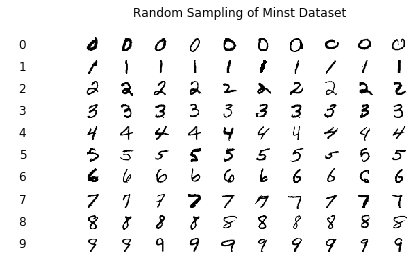

In [155]:
def P1(num_examples=10):

    ### STUDENT START ###
    
    #constants
    num_digits=10
    x_dim=28
    y_dim=28
    
    #see appendix for this function
    display_digits(mini_train_data,
                   mini_train_labels,
                   seed=None,
                   num_examples=num_examples,
                   num_digits=num_digits,
                   x_dim=x_dim,
                   y_dim=y_dim,
                   main_title="Random Sampling of Minst Dataset")

    ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [49]:
def P2(k_values):

    ### STUDENT START ###
    knn = {}
    for val in k_values:
        knn[val] = KNeighborsClassifier(n_neighbors=val)
        knn[val].fit(mini_train_data,mini_train_labels)
        y_predict=knn[val].predict(dev_data)
        print("######### Classification Report for k = " + str(val) + " ##########")
        print(classification_report(dev_labels,y_predict))
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

######### Classification Report for k = 1 ##########
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

######### Classification Report for k = 3 ##########
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75

ANSWER:

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [55]:
def P3(train_sizes, accuracies):

    ### STUDENT START ###
    knn = {}
    for val in train_sizes:
        knn[val] = KNeighborsClassifier(n_neighbors=1)
        t0=time.time()
        knn[val].fit(train_data[:val],train_labels[:val])
        t1=time.time()
        accuracies.append(knn[val].score(dev_data,dev_labels))
        print("##### Training Size = " + str(val) + " #####")
        print("        Training Time = " + "{:.4f}".format(t1-t0) + "s")
        print("        Accuracy = " + "{:.4f}".format(accuracies[-1]))
    ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

### Training Size = 100 ###
        Training Time = 0.0013s
        Accuracy = 0.7200
### Training Size = 200 ###
        Training Time = 0.0015s
        Accuracy = 0.7860
### Training Size = 400 ###
        Training Time = 0.0041s
        Accuracy = 0.8410
### Training Size = 800 ###
        Training Time = 0.0090s
        Accuracy = 0.8840
### Training Size = 1600 ###
        Training Time = 0.0228s
        Accuracy = 0.9020
### Training Size = 3200 ###
        Training Time = 0.0855s
        Accuracy = 0.9260
### Training Size = 6400 ###
        Training Time = 0.2715s
        Accuracy = 0.9370
### Training Size = 12800 ###
        Training Time = 0.9082s
        Accuracy = 0.9590
### Training Size = 25000 ###
        Training Time = 3.3623s
        Accuracy = 0.9700


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Predicted accuracy for training set of size 6000 is: [[ 1.24307226]]
Predicted accuracy for training set of size 6000 is: [[ 1.03386514]]


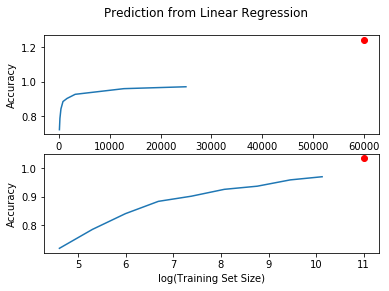

In [85]:
def P4():

    ### STUDENT START ###
    #data setup
    X=np.array(train_sizes).reshape(-1, 1)
    log_X=np.log(X)
    Y=np.array(accuracies).reshape(-1, 1)
    log_Y=np.log(Y)
    Target=60000
    log_Target=np.log(Target)
    #without transformation
    lr1=LinearRegression()
    lr1.fit(X,Y)
    pred1=lr1.predict(Target)
    print("Predicted accuracy for training set of size 6000 is: " + str(pred1))
    #with transformation
    lr2=LinearRegression()
    lr2.fit(log_X,Y)
    pred2=lr2.predict(log_Target)
    print("Predicted accuracy for training set of size 6000 is: " + str(pred2))
    #visualize
    fig,axes=plt.subplots(2,1)
    plt.suptitle("Prediction from Linear Regression")
    axes[0].plot(X,Y)
    axes[0].plot(Target,pred1,color="r",marker="o")
    axes[0].set_xlabel("Training Set Size")
    axes[0].set_ylabel("Accuracy")
    axes[1].plot(log_X,Y)
    axes[1].plot(log_Target,pred2,color="r",marker="o")
    axes[1].set_xlabel("log(Training Set Size)")
    axes[1].set_ylabel("Accuracy")
    ### STUDENT END ###

P4()


ANSWER:

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [95]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_data,train_labels)
y_predict=knn1.predict(dev_data)

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]


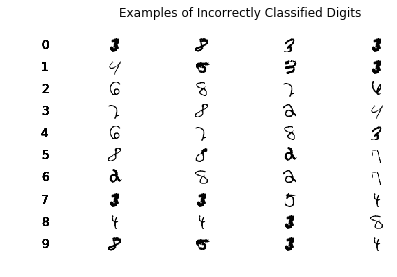

In [101]:
def P5():

    ### STUDENT START ###
    
    #classifier
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(train_data,train_labels)
    y_predict=knn1.predict(dev_data)
    print(confusion_matrix(dev_labels,y_predict))
    
    #constants
    num_digits=10
    num_examples=4
    x_dim=28
    y_dim=28
    pad=5 #points
    
    #display misclassified examples
    fig,axes=plt.subplots(num_digits,num_examples)
    plt.suptitle("Examples of Incorrectly Classified Digits")
    for digit in range(0,num_digits):
        digit_index=(np.asarray(np.where(dev_labels!=y_predict))).flatten()
        example_index=np.random.choice(digit_index,size=num_examples,replace=True)
        for example in range(0,num_examples):
            disp_digit=dev_data[example_index[example]]
            disp_digit=disp_digit.reshape(x_dim,y_dim)
            axes[digit,example].imshow(disp_digit,cmap="Greys")
            axes[digit,example].axis("off")
        
        #label each row
        for ax, digit in zip(axes[:,0], range(0,num_digits)):
            ax.annotate(str(digit), xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
    ### STUDENT END ###

P5()

ANSWER:
8 and 3 are the most often misclassified pair. Two 8s were classified as 3, and one 3 was classified as 8.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [150]:
x_dim=28
y_dim=28
blur_dev_data=np.zeros(dev_data.shape)
blur(dev_data,blur_dev_data,x_dim,y_dim)
blur_train_data=np.zeros(train_data.shape)
blur(train_data,blur_train_data,x_dim,y_dim)

######### Classification Report for Blurred Training ##########
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99        99
        1.0       0.99      1.00      1.00       105
        2.0       0.99      0.96      0.98       102
        3.0       0.95      0.94      0.95        86
        4.0       0.99      0.98      0.99       104
        5.0       0.99      0.98      0.98        91
        6.0       1.00      0.98      0.99        98
        7.0       0.98      0.99      0.99       113
        8.0       0.99      0.97      0.98        96
        9.0       0.95      1.00      0.97       106

avg / total       0.98      0.98      0.98      1000

######### Classification Report for Blurred Dev ##########
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98        99
        1.0       0.96      1.00      0.98       105
        2.0       0.99      0.92      0.95       102
        3.0       0.94   

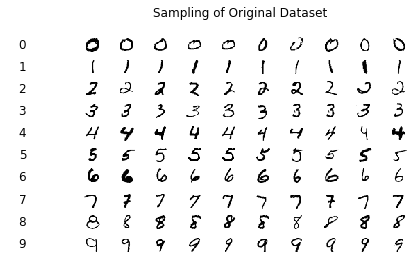

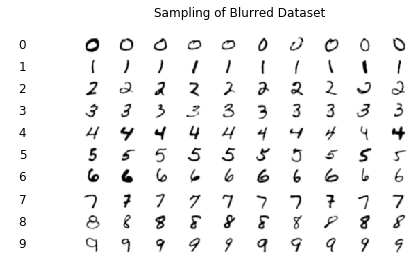

In [157]:
def P6():
    
    ### STUDENT START ###
    
    #blur data
    #blur_dev_data=[]
    #blur(dev_data,blur_dev_data,x_dim,y_dim)
    #blur_train_data=[]
    #blur(train_data,blur_train_data,x_dim,y_dim)
    
    #visualize blur
    display_digits(dev_data,dev_labels,seed=0,main_title="Sample of Original Dataset")
    display_digits(blur_dev_data,dev_labels,seed=0,main_title="Matching Sample of Blurred Dataset")
    
    #training only
    knn_blur = KNeighborsClassifier(n_neighbors=1)
    knn_blur.fit(blur_train_data,train_labels)
    predict_a=knn_blur.predict(dev_data)
    print("######### Classification Report for Blurred Training ##########")
    print(classification_report(dev_labels,predict_a))
    
    #dev only
    knn_norm = KNeighborsClassifier(n_neighbors=1)
    knn_norm.fit(train_data,train_labels)
    predict_b=knn_norm.predict(blur_dev_data)
    print("######### Classification Report for Blurred Dev ##########")
    print(classification_report(dev_labels,predict_b))
    
    #training and dev
    predict_c=knn_blur.predict(blur_dev_data)
    print("######### Classification Report for Blurred Training and Dev ##########")
    print(classification_report(dev_labels,predict_c))

    ### STUDENT END ###
                
### STUDENT END ###
P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

### Binary Naive Bayes Classifier ###
             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96        99
        1.0       0.86      0.95      0.90       105
        2.0       0.88      0.79      0.84       102
        3.0       0.70      0.76      0.73        86
        4.0       0.86      0.83      0.84       104
        5.0       0.88      0.77      0.82        91
        6.0       0.91      0.88      0.89        98
        7.0       0.93      0.82      0.87       113
        8.0       0.75      0.82      0.79        96
        9.0       0.76      0.83      0.79       106

avg / total       0.85      0.84      0.85      1000

### Binary Naive Bayes Classifier ###
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95        99
        1.0       0.89      0.93      0.91       105
        2.0       0.86      0.78      0.82       102
        3.0       0.75      0.76      0.75        86
        4.0       0

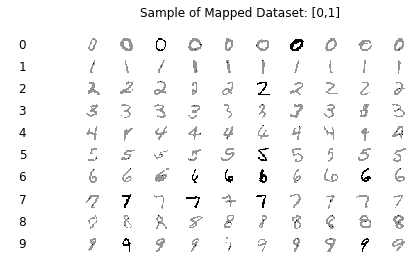

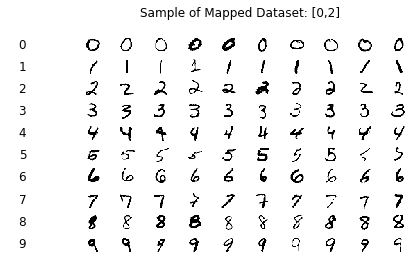

In [183]:
def P7():

    ### STUDENT START ###
    map1_train_data=train_data
    map1_train_data=mapping(map1_train_data,1)
    map1_dev_data=dev_data
    map1_dev_data=mapping(map1_dev_data,1)
    #display_digits(map1_train_data,train_labels,main_title="Sample of Mapped Dataset: [0,1]")
    bnb = BernoulliNB()
    bnb.fit(map1_train_data,train_labels)
    predict_bnb = bnb.predict(map1_dev_data)
    print("### Binary Naive Bayes Classifier ###")
    print(classification_report(dev_labels,predict_bnb))
    
    map2_train_data=train_data
    map2_train_data=mapping(map2_train_data,2)
    map2_dev_data=dev_data
    map2_dev_data=mapping(map2_dev_data,2)
    #display_digits(map2_train_data,train_labels,main_title="Sample of Mapped Dataset: [0,2]")
    mnb = MultinomialNB()
    mnb.fit(map2_train_data,train_labels)
    predict_mnb = mnb.predict(map2_dev_data)
    print("### Binary Naive Bayes Classifier ###")
    print(classification_report(dev_labels,predict_mnb))
    ### STUDENT END ###

P7()

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [189]:
def P8(alphas):

    ### STUDENT START ###
    
    map1_train_data=train_data
    map1_train_data=mapping(map1_train_data,1)
    map1_dev_data=dev_data
    map1_dev_data=mapping(map1_dev_data,1)
    
    bnb = BernoulliNB()
    grid_search = GridSearchCV(estimator=bnb,
                               param_grid=alphas)
    grid_search.fit(map1_train_data, train_labels)
    print(grid_search.grid_scores_)
    
    #bnb.fit(map1_train_data,train_labels)
    #predict_bnb = bnb.predict(map1_dev_data)
    #print("### Binary Naive Bayes Classifier ###")
    #print(classification_report(dev_labels,predict_bnb))
    
    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[mean: 0.83712, std: 0.00253, params: {'alpha': 0.0}, mean: 0.83690, std: 0.00270, params: {'alpha': 0.0001}, mean: 0.83670, std: 0.00266, params: {'alpha': 0.001}, mean: 0.83652, std: 0.00268, params: {'alpha': 0.01}, mean: 0.83615, std: 0.00274, params: {'alpha': 0.1}, mean: 0.83543, std: 0.00269, params: {'alpha': 0.5}, mean: 0.83505, std: 0.00284, params: {'alpha': 1.0}, mean: 0.83452, std: 0.00293, params: {'alpha': 2.0}, mean: 0.83245, std: 0.00271, params: {'alpha': 10.0}]


/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [ ]:
#def P9():

### STUDENT END ###
# consider changing the variance (maybe sigma)

### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [ ]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [ ]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
# prior probability is the frequency of the digit
# other term is the accuracy of the digit

                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()

Appendix

In [156]:
def display_digits(data,labels,seed=None,num_digits=10,num_examples=10,x_dim=28,y_dim=28,main_title="Random Sampling of Dataset"):
    
    #constants
    np.random.seed(seed)
    pad=5
    #plot setup
    fig,axes=plt.subplots(num_digits,num_examples)
    plt.suptitle(main_title)
    #display examples
    for digit in range(0,num_digits):
        digit_index=(np.asarray(np.where(labels==digit))).flatten()
        example_index=np.random.choice(digit_index,size=(num_examples),replace=True)
        for example in range(0,num_examples):
            disp_digit=data[example_index[example]]
            disp_digit=disp_digit.reshape(x_dim,y_dim)
            axes[digit,example].imshow(disp_digit,cmap="Greys")
            axes[digit,example].axis("off")
    
    #label each row
    for ax, digit in zip(axes[:,0], range(0,num_digits)):
        ax.annotate(str(digit), xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
            xycoords=ax.yaxis.label, textcoords='offset points',
            size='large', ha='right', va='center')

In [149]:
#blur an array of images
def blur(orig,result,x_dim,y_dim):
    for ex_count,example in enumerate(orig):
        image=np.zeros(x_dim*y_dim)
        weights=[4,2,1,2,1,2,1,2,1]
        for row in range(0,y_dim):
            for col in range(0,x_dim):
                #counter-clockwise from top
                index=[flat_index(row,col,y_dim),
                       flat_index(row-1,col,y_dim),
                       flat_index(row-1,col-1,y_dim),
                       flat_index(row,col-1,y_dim),
                       flat_index(row+1,col-1,y_dim),
                       flat_index(row+1,col,y_dim),
                       flat_index(row+1,col+1,y_dim),
                       flat_index(row,col+1,y_dim),
                       flat_index(row-1,col+1,y_dim)]
                image[flat_index(row,col,y_dim)]=blur_pixel(example,index,weights)
        result[ex_count]=image

#weighted blur of a single pixel and it's neighbors
def blur_pixel(source,index,weights):
    accumulator=0
    counter=0
    for ind in range(0,len(index)):
        pixel=index[ind]
        if(0<=pixel&pixel<len(source)):
            accumulator=accumulator+source[pixel]*weights[ind]
            counter=counter+1*weights[ind]
    return(accumulator/counter)

#turn (row,col) into 1D image index
def flat_index(row,col,y_dim):
    return(row*y_dim+col)

In [179]:
#map np.array of floats on interval [0,1] to ints on [0,n]
def mapping(data,n):
    orig_shape=data.shape
    data=data.flatten()
    data=np.floor(data*(n+1))
    data[np.where(data==n+1)]=n
    data=data.reshape(orig_shape)
    return(data)